In [186]:
# =========================
# HEART DISEASE PREDICTION
# =========================

# Import pandas library
# pandas is used to load, read, and manipulate datasets in table format
# Example: reading CSV files, selecting columns, cleaning data
import pandas as pd

# Import numpy library
# numpy is used for numerical operations like arrays, math functions
# It makes computations faster and efficient
import numpy as np

# Import matplotlib.pyplot
# matplotlib is used to create graphs and plots
# pyplot provides functions like plot(), show(), title()
import matplotlib.pyplot as plt

# Import seaborn library
# seaborn is built on matplotlib and provides better, more attractive graphs
# It is especially useful for data analysis and visualization
import seaborn as sns

# Import train_test_split function
# This function splits dataset into training data and testing data
# Training data is used to train the model
# Testing data is used to test the model
from sklearn.model_selection import train_test_split

# Import StandardScaler
# This is used to scale the data (normalize values)
# Scaling ensures all features are on same scale
# This improves model performance
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression model
# Logistic Regression is used for binary classification
# It predicts 0 or 1 (No disease or Disease)
from sklearn.linear_model import LogisticRegression

# Import Decision Tree model
# Decision Tree creates tree-like structure to make predictions
from sklearn.tree import DecisionTreeClassifier

# Import evaluation metrics
# These are used to evaluate model performance

# accuracy_score → tells percentage of correct predictions
# confusion_matrix → shows prediction errors
# roc_curve → used to draw ROC graph
# roc_auc_score → tells how good model is overall
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [187]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

# Show first 5 rows of dataset
# This helps us understand structure of dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [188]:
# Display basic information about dataset

# info() shows:
# number of rows
# number of columns
# column names
# data types
# missing values
df.info()


# describe() shows statistical summary
# mean → average value
# std → standard deviation
# min → minimum value
# max → maximum value
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [189]:
# Check if dataset contains missing values

# isnull() checks missing values
# sum() counts how many missing values in each column
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [190]:
# Remove rows with missing values
# This cleans the dataset
df = df.dropna()


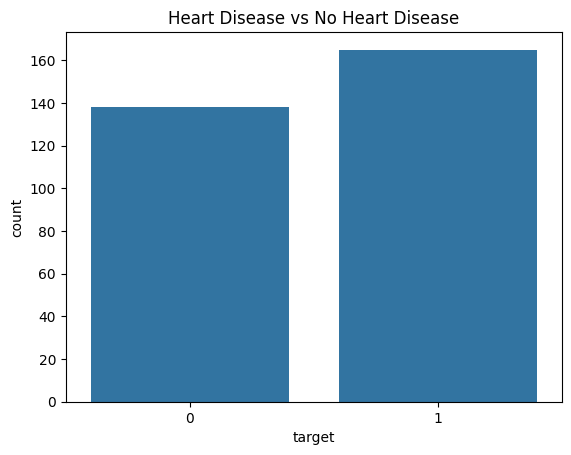

In [191]:
# Plot count of heart disease vs no heart disease

# countplot counts number of 0 and 1
# x="target" means plot target column
sns.countplot(x="target", data=df)

# Add title to graph
plt.title("Heart Disease vs No Heart Disease")

# Display graph
plt.show()


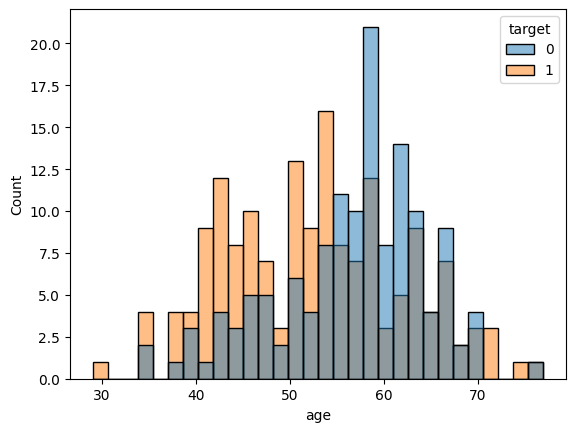

In [192]:
# Plot age distribution

# histplot creates histogram
# x="age" means age on X-axis
# hue="target" separates by disease status
# bins=30 divides into 30 groups
sns.histplot(data=df, x="age", hue="target", bins=30)

# Show graph
plt.show()


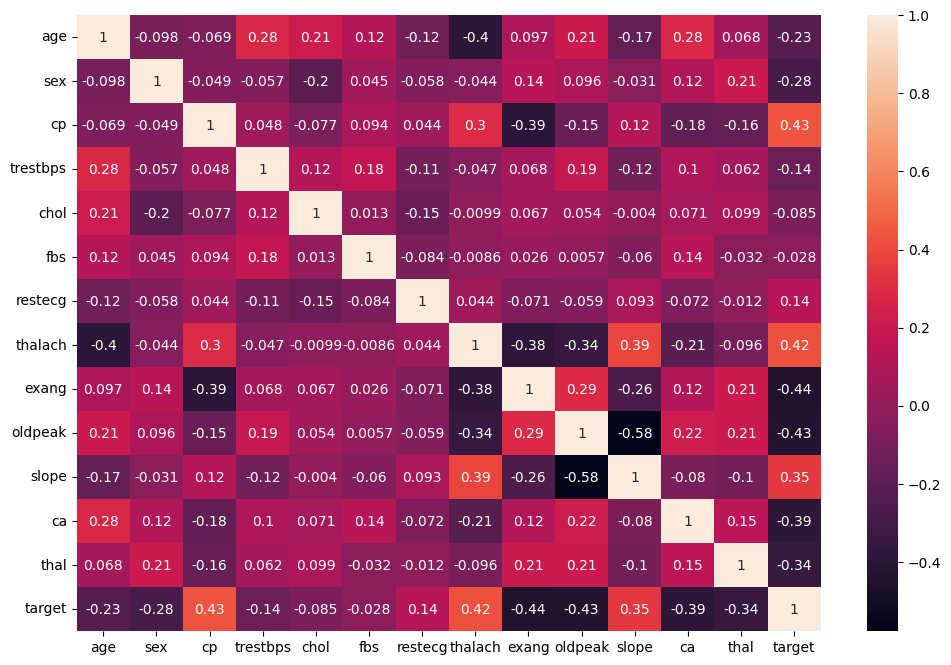

In [193]:
# Create correlation matrix

# corr() calculates correlation between features
correlation_matrix = df.corr()

# Set figure size
plt.figure(figsize=(12,8))

# heatmap visualizes correlation
# annot=True shows numbers inside boxes
sns.heatmap(correlation_matrix, annot=True)

# Show heatmap
plt.show()


In [194]:
# X contains input features
# drop("target") removes target column
X = df.drop("target", axis=1)

# y contains output target
y = df["target"]


In [195]:
# Split dataset

# test_size=0.2 means 20% testing data
# random_state=42 ensures same split every time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [196]:
# Create scaler object
scaler = StandardScaler()

# Fit scaler on training data and transform
# fit learns scaling parameters
# transform applies scaling
X_train = scaler.fit_transform(X_train)

# Only transform test data
X_test = scaler.transform(X_test)


In [197]:
# Create Logistic Regression model
model = LogisticRegression()

# Train model using training data
model.fit(X_train, y_train)


LogisticRegression()

In [198]:
# Predict heart disease on test data
y_pred = model.predict(X_test)


In [199]:
# Calculate accuracy

# accuracy_score compares actual and predicted values
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8524590163934426


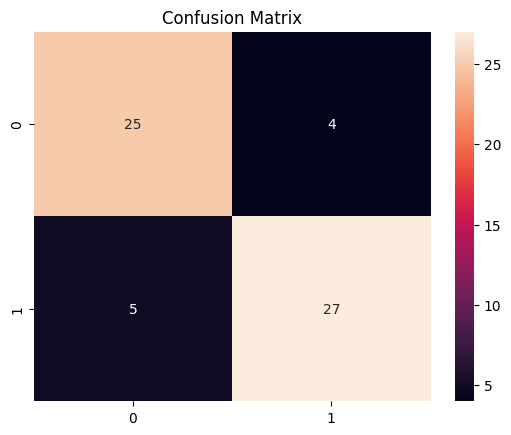

In [200]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

# Add title
plt.title("Confusion Matrix")

# Show graph
plt.show()


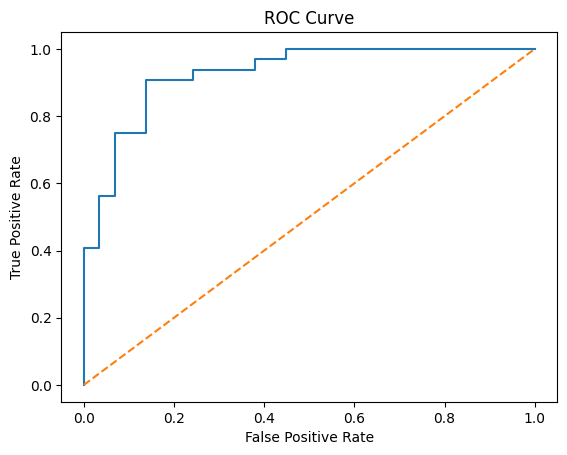

In [201]:
# Get prediction probabilities
y_prob = model.predict_proba(X_test)[:,1]

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr)

# Plot diagonal line
plt.plot([0,1], [0,1], linestyle="--")

# Add labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Add title
plt.title("ROC Curve")

# Show graph
plt.show()


In [202]:
# Calculate ROC-AUC score
roc_score = roc_auc_score(y_test, y_prob)

# Print ROC score
print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.9267241379310345


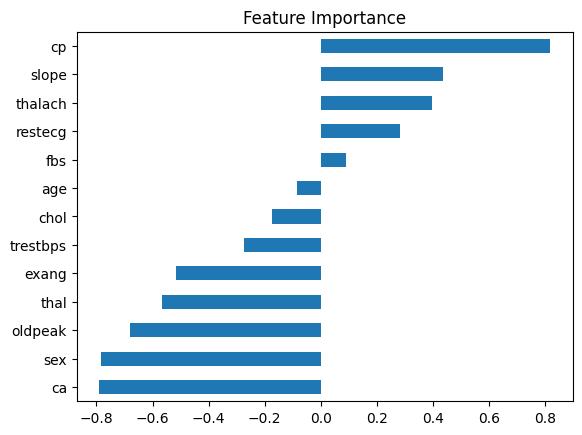

In [203]:
# Get feature importance from logistic regression

importance = pd.Series(model.coef_[0], index=df.columns[:-1])

# Sort values
importance.sort_values().plot(kind="barh")

# Add title
plt.title("Feature Importance")

# Show graph
plt.show()


In [204]:
# Decision Tree comparison:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, tree_pred))

Decision Tree Accuracy: 0.8360655737704918


In [205]:
# ============================================
# RANDOM PERSON HEART DISEASE PREDICTION CELL
# ============================================

# Import random module
# This helps select random index number
import random

# Step 1: Get total number of samples in test dataset
total_samples = X_test.shape[0]

# Step 2: Generate random index between 0 and total_samples-1
random_index = random.randint(0, total_samples - 1)

# Step 3: Select random person from test dataset
# reshape(1, -1) converts data into correct format for model
random_person = X_test[random_index].reshape(1, -1)

# Step 4: Get actual result from dataset
actual_result = y_test.iloc[random_index]

# Step 5: Predict using trained model
predicted_result = model.predict(random_person)[0]

# Step 6: Get probability scores
probabilities = model.predict_proba(random_person)

# Step 7: Convert numeric result into disease name
# 0 = No Heart Disease
# 1 = Heart Disease

if actual_result == 0:
    actual_disease_name = "No Heart Disease"
else:
    actual_disease_name = "Heart Disease"

if predicted_result == 0:
    predicted_disease_name = "No Heart Disease"
else:
    predicted_disease_name = "Heart Disease"

# Step 8: Print all results

print("===================================")
print("Random Person Index:", random_index)
print("===================================")

print("\nACTUAL RESULT:")
print("Numeric:", actual_result)
print("Disease Name:", actual_disease_name)

print("\nPREDICTED RESULT:")
print("Numeric:", predicted_result)
print("Disease Name:", predicted_disease_name)

print("\nPROBABILITY SCORES:")
print("No Heart Disease Probability:", probabilities[0][0])
print("Heart Disease Probability:", probabilities[0][1])

# Step 9: Check if prediction is correct

if actual_result == predicted_result:
    print("\nModel Prediction was CORRECT")
else:
    print("\nModel Prediction was WRONG")


Random Person Index: 43

ACTUAL RESULT:
Numeric: 1
Disease Name: Heart Disease

PREDICTED RESULT:
Numeric: 1
Disease Name: Heart Disease

PROBABILITY SCORES:
No Heart Disease Probability: 0.2857986010503486
Heart Disease Probability: 0.7142013989496514

Model Prediction was CORRECT
